**Getting Reddit Posts and Comments, and cleaning them:**

In [2]:
import json
from pymongo import MongoClient
import praw
import time
import pandas as pd
pd.set_option('max_colwidth',1000)
%matplotlib inline
client = MongoClient(port=12345)

For the below retrieving and cleaning actions, I completed them in another notebook, and am showing them here for reference. I will just be loading my posts and comments from a pickle file at the end.

In [ ]:
c = client
db = client.reddit
depression_comments = db.depression_commments
depression_posts = db.depression_posts
anxiety_comments = db.anxiety_comments
anxiety_posts = db.anxiety_posts
suicide_posts = db.suicide_posts
suicide_comments = db.suicide_comments

In [ ]:
reddit = praw.Reddit(client_id="",username="", password="", client_secret="", user_agent="")
post_info = []
comments = []

#subreddit = reddit.subreddit('anxiety')

#a= subreddit.new(limit=5)
counter = 0
for submission in reddit.subreddit("depression").submissions(1459468800,1460728535):
    cs = {}
    pi = {}
    pi["title"] = submission.title
    pi["score"]= submission.score
    pi["id"] = submission.id
    pi["selftext"] = submission.selftext
    pi["created"] = submission.created
    pi["name"] = str(submission.author)
    cs["id"] = submission.id
    submission.comments.replace_more(limit=0)
    for z, y in enumerate(submission.comments):
        name = "com{}".format(z)
        cs[name] = y.body
    post_info.append(pi)
    comments.append(cs)
    depression_comments.insert_one(cs)
    depression_posts.insert_one(pi)

    counter +=1
    if counter  % 300 == 0:
        print(counter)
        time.sleep(90)


In [ ]:
counter = 0
for submission in reddit.subreddit("anxiety").submissions(1459468800,1460728535):
    cs = {}
    pi = {}
    pi["title"] = submission.title
    pi["score"]= submission.score
    pi["id"] = submission.id
    pi["selftext"] = submission.selftext
    pi["created"] = submission.created
    pi["name"] = str(submission.author)
    cs["id"] = submission.id
    submission.comments.replace_more(limit=0)
    for z, y in enumerate(submission.comments):
        name = "com{}".format(z)
        cs[name] = y.body
    post_info.append(pi)
    comments.append(cs)
    anxiety_comments.insert_one(cs)
    anxiety_posts.insert_one(pi)

    counter +=1
    if counter  % 300 == 0:
        print(counter)
        time.sleep(90)


In [ ]:
counter = 0
for submission in reddit.subreddit("suicidewatch").submissions(1459468800,1460728535):
    cs = {}
    pi = {}
    pi["title"] = submission.title
    pi["score"]= submission.score
    pi["id"] = submission.id
    pi["selftext"] = submission.selftext
    pi["created"] = submission.created
    pi["name"] = str(submission.author)
    cs["id"] = submission.id
    submission.comments.replace_more(limit=0)
    for z, y in enumerate(submission.comments):
        name = "com{}".format(z)
        cs[name] = y.body
    post_info.append(pi)
    comments.append(cs)
    suicide_comments.insert_one(cs)
    suicide_posts.insert_one(pi)

    counter +=1
    if counter  % 300 == 0:
        print(counter)
        time.sleep(90)


In [ ]:
depression = pd.DataFrame(list(depression_posts.find()))

In [ ]:
depression["Type"] = "depression"

In [ ]:
suicide = pd.DataFrame(list(suicide_posts.find()))

In [ ]:
suicide["Type"] = "suicide"

In [ ]:
anxiety = pd.DataFrame(list(anxiety_posts.find()))

In [ ]:
anxiety["Type"] = "anxiety"

In [ ]:
posts = depression.append([suicide, anxiety], ignore_index=True)

Dropping duplicates just in case there were any errors/issues.

In [ ]:
posts = posts.drop_duplicates(subset="id")

I combine the title and the text together as many people use the title as the first sentence of their post.

In [ ]:
posts["total_text"] = posts["title"] + " " + posts["selftext"]

In [ ]:
posts["split_text"] = posts["total_text"].apply(lambda x: x.split(" "))

In [ ]:
posts["text_length_simple"] = posts["split_text"].apply(lambda x: len(x))

In [ ]:
posts = posts[posts.text_length_simple > 8]

In [2]:
posts = pd.read_pickle("posts.pkl")

In [3]:
posts.shape

(4313, 12)

In [10]:
posts.Type.value_counts()

suicide       1794
depression    1307
anxiety       1212
Name: Type, dtype: int64

Differences in type amount came from rate limits and limiting posts under 5 words long. However, it looks like I still have a good representation of all groups.

In [6]:
posts.head()

,_id,created,id,name,score,selftext,title,Type,total_text,split_text,text_length_simple,label
0,591dffd6f7327e5f6df05935,1.460275e+09,4e3oc9,Dance_trey_dance,2,Why do I live? Why do I keep fighting? What's the point? Is there any reason for me to stick around?,But why?,depression,But why? Why do I live? Why do I keep fighting? What's the point? Is there any reason for me to stick around?,"[But, why?, Why, do, I, live?, Why, do, I, keep, fighting?, What's, the, point?, Is, there, any, reason, for, me, to, stick, around?]",23,2
1,591dffd6f7327e5f6df05937,1.460275e+09,4e3o7b,EmptyShell11,2,"I don't know how I got to this point. Nearly 30 years old with no friends, no love life, no close family relationships and generally no one who would enjoy spending time with me.\nI emigrated to USA as a young child and always had trouble fitting in. I had a group of friends back in high school but I was always the outcast of the group. My interests never really did match up with theirs and try as I might, I never did feel comfortable with them. I stayed in contact with them throughout college by attending the few lunches or dinners they had once or twice a year. Over time, I have lost touch with all of them. A few friends I did manage to make in university never reach out to me. I tried getting in contact with one of them recently and was flat out ignored. \nThis brings me to where I am now. I am tired, I am lonely and I just wanted to share my sad pathetic life with everyone on the internet. I don't want to die and I'm not suicidal but I don't want to feel this way anymore. \nI h...",Just Survive Somehow,depression,"Just Survive Somehow I don't know how I got to this point. Nearly 30 years old with no friends, no love life, no close family relationships and generally no one who would enjoy spending time with me.\nI emigrated to USA as a young child and always had trouble fitting in. I had a group of friends back in high school but I was always the outcast of the group. My interests never really did match up with theirs and try as I might, I never did feel comfortable with them. I stayed in contact with them throughout college by attending the few lunches or dinners they had once or twice a year. Over time, I have lost touch with all of them. A few friends I did manage to make in university never reach out to me. I tried getting in contact with one of them recently and was flat out ignored. \nThis brings me to where I am now. I am tired, I am lonely and I just wanted to share my sad pathetic life with everyone on the internet. I don't want to die and I'm not suicidal but I don't want to feel th...","[Just, Survive, Somehow, I, don't, know, how, I, got, to, this, point., Nearly, 30, years, old, with, no, friends,, no, love, life,, no, close, family, relationships, and, generally, no, one, who, would, enjoy, spending, time, with, me.\nI, emigrated, to, USA, as, a, young, child, and, always, had, trouble, fitting, in., I, had, a, group, of, friends, back, in, high, school, but, I, was, always, the, outcast, of, the, group., My, interests, never, really, did, match, up, with, theirs, and, try, as, I, might,, I, never, did, feel, comfortable, with, them., I, stayed, in, contact, with, them, throughout, college, by, attending, ...]",211,1
2,591dffd7f7327e5f6df05939,1.460275e+09,4e3nmq,-_Vamp_-,10,"As a kid I used to draw all the time. I was really good at drawing, at least for my age. Tonight, I felt like drawing after I couldn't fall asleep for hours but... I couldn't think of anything. My head was empty. All I managed to draw were some stupid, ugly low effort doodles. That makes me so sad.",All creativity gone :(,depression,"All creativity gone :( As a kid I used to draw all the time. I was really good at drawing, at least for my age. Tonight, I felt like drawing after I couldn't fall asleep for hours but... I couldn't think of anything. My head was empty. All I managed to draw were some stupid, ugly low effort doodles. That makes me so sad.","[A

In [9]:
posts.sample(5)["total_text"]

484                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   I can't get out of my head I have depression/anxiety disorder as well as panic disorder paired with agoraphobia. I often get stuck in my head. I appear to be okay, but I'm really suffering from a panic attack in my head... my thoughts sutter... I can't get past certain things... everything races... Please tell me I'm not

Topics appear to be all over the map

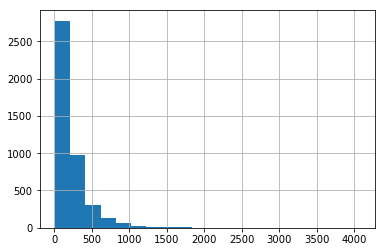

In [15]:
posts.text_length_simple.hist(bins=20)

Mosts posts are relatievely short...under 500 words. However, there are some longer ones.

In [16]:
posts[posts.text_length_simple > 1500].sample(1)["total_text"]

3034    A short story I wrote about the cycle of Depression and Anxiety Sensible\n\n\nShe woke up with a full bladder, remembering a dream just had where she had wet herself in public. The same urge woke her up frequently, and wondered if this was just life now. Throwing off the covers she went to the bathroom nearly tripping over the cat on the way.\n\n8am. Her phone said it was 8am. Why the hell am I awake at 8am’ she wondered? It was her weekend; those were the days she was allowed to sleep late. Just another thing she would have to get used to, along with spotting a few new wrinkles on her face earlier in the week and the constant pain in various body parts, I guess it was inevitable, getting older. \n\nIt was cold in her tiny flat, so she went back to bed and nestled back in the warm space she had created over night.\n\nWhat shall I do today, she pondered, writing a list in her head of all the things needed to be done.  It was a full days work and it would pay to be prepared. Orga

In [19]:
posts.sort_values("score", ascending=False).head()["total_text"]

3392                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              After fighting years of having a crippling fear of heights I climbed MT. Fuji today! [

Looks like most of the higher score posts are uplifting/overcoming obstacles type posts.

**Now lets look at the comments:**

First, let's combine the comments from each of the three subreddits into one dataframe:

In [ ]:
depressioncom = pd.DataFrame(list(depression_comments.find()))
depressioncom["type"] = "depression"

In [ ]:
anxietycom = pd.DataFrame(list(anxiety_comments.find()))
anxietycom["type"] = "anxiety"

In [ ]:
suicidecom = pd.DataFrame(list(suicide_comments.find()))
suicidecom["type"] = "suicide"

In [ ]:
totalcomments = pd.concat([depressioncom, anxietycom, suicidecom])
totalcomments= totalcomments.drop_duplicates(subset="id")


In [ ]:
totalcomments.shape
#(4393,111) -the largest number of columns are for the posts that have a lot of comments 
#most of those files will be NaNs.

Now, lets combine all the comments per post into one column (makes it easier to do topic modelling).

In [ ]:
totalcomments["total_comments"] = totalcomments[totalcomments.columns[1: -3]].apply(lambda row: ' '.join(map(str, row)), axis=1)

Here I am going to remove any NaNs that got into the total_comments section:

In [ ]:
totalcomments["total_comments"] = totalcomments["total_comments"].apply(lambda x: x.replace("nan", ""))

Now lets label rows as NaN if any of the total comments is less than 5 words:

In [ ]:
def strip_NaN(row):
    row = row.strip()
    if len(row) < 5:
        row = np.NaN
    return row

In [ ]:
totalcomments.total_comments = totalcomments.total_comments.apply(lambda x: strip_NaN(x))

In [4]:
totalcomments = pd.read_pickle("comments.pkl")

In [6]:
totalcomments.head(2)

,_id,com0,com1,com10,com100,com101,com102,com103,com104,com105,...,com93,com94,com95,com96,com97,com98,com99,id,type,total_comments
0,591dffd5f7327e5f6df05934,"That's all up to you, my friend. You can choose to end your story now or you can choose to keep going and see what comes next. We have to come up with our own reasons to stick around. As for me, I stick around partly because I'm stubborn and refuse to let the depression win and I have some people who love me who would be totally devastated. I reply to people on here so I can feel like I have a purpose when I encourage others and show a little love and care.","No. And me neither. We stick around because killing ourselves is hard and we feel bad because it feels like throwing in the towel. And because we have hope that it will get better. But what does that mean? Will we get friends? Will we have a life we want to come home to? In my case, no.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4e3oc9,depression,"That's all up to you, my friend. You can choose to end your story now or you can choose to keep going and see what comes next. We have to come up with our own reasons to stick around. As for me, I stick around partly because I'm stubborn and refuse to let the depression win and I have some people who love me who would be totally devastated. I reply to people on here so I can feel like I have a purpose when I encourage others and show a little love and care. No. And me neither. We stick around because killing ourselves is hard and we feel bad because it feels like throwing in the towel. And because we have hope that it will get better. But what does that mean? Will we get friends? Will we have a life we want to come home to? In my case, no."
1,591dffd6f7327e5f6df05936,What are your interests?,Hang in there. Many feel like you. It is much harder to maintain and build friendships outside of high school and college. Everyone seems so self absorbed or not interested in new friendships. It's especially hard for people who aren't naturally outgoing. Don't be so hard on yourself. You took the time to put yourself out here. Hopefully we can provide you support and encouragement. I understand you feeling tired and lonely. You are not alone here. Hang in there,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4e3o7b,depression,What are your interests? Hang in there. Many feel like you. It is much harder to maintain and build friendships outside of high school and college. Everyone seems so self absorbed or not interested in new friendships. It's especially hard for people who aren't naturally outgoing. Don't be so hard on yourself. You took the time to put yourself out here. Hopefully we can provide you support and encouragement. I understand you feeling tired and lonely. You are not alone here. Hang in there
